## Quanto tempo para terminar o jogo?

## Qual a probabilidade dessa situação atual do jogo ser real? E não ser fabricada manualmente (= roubada)

In [1]:
import numpy as np

# another approach is to use a set with the MARKED positions
# card_positions = [4,8,12,16,19,25,30,33,36,41,44,47]

board = [0] * 52
board[4] = 1
board[8] = 1
board[12] = 1
board[16] = 1
board[19] = 1
board[25] = 1
board[30] = 1
board[33] = 1
board[36] = 1
board[41] = 1
board[44] = 1
board[47] = 1
board = np.array(board)

In [2]:
# two variations

BALANCED_CARDS = [ -6,-5,-4,-3,-2,-1,1,2,3,4,5,6]
SLOW_CARDS = [-6,-5,-4,-3,-2,-1]
ORIGINAL_CARDS = [-6, -5, -4, -3, -2, -1, 1, 2, 3, 3, 4, 6]

In [3]:
# regra assumida: quando você pega uma carta e usa, ela volta pra pilha, EMBARALHADA

In [4]:
DICE_FACES = 4

In [5]:
np.random.seed(43354)

class Game:
  def __init__(self, players, board, player_time, cards = None):
    self.players = players
    self.board = board
    self.cards = cards
    if not self.cards:
      self.cards = []
    # current_player pode ser calculado atraves do turno
    self.current_player = 0
    self.turn = 1
    self.player_position = np.array([0, 0])
    self.player_time = player_time
    self.current_time = 0
    self.red_turns = 0
    self.bonus_movements = 0

  def limit(self, position):
    return  min((len(self.board)-1), max(0, position))

  def next_turn(self):

    dice = np.random.choice(DICE_FACES) + 1
    self.current_time += self.player_time[self.current_player]

    position = self.limit(self.player_position[self.current_player] + dice)
    while board[position] == 1 and len(self.cards) > 0:
      card = np.random.choice(self.cards)
      self.bonus_movements += card
      self.red_turns += 1
      position = self.limit(position + card)

    self.player_position[self.current_player] = position

    if position >= len(self.board) - 1:
      return False

    self.current_player = (self.current_player + 1) % self.players
    self.turn += 1
    return True


In [6]:
# o tempo em funcao do numero de jogadores?

def simulate(player_time, cards=None):
  game = Game(2, board, player_time=player_time, cards=cards)
  while game.next_turn():
    pass
  return [game.current_time / 60.0, game.current_player, game.turn, game.player_position, game.red_turns, game.bonus_movements]
simulate([5,30])

[11.083333333333334, 1, 38, array([42, 51]), 0, 0]

In [7]:
from tqdm import tqdm


In [8]:
import pandas as pd

np.random.seed(43278)
results = [simulate([5,30]) for i in tqdm(range(10000))]
results = pd.DataFrame(results, columns=["time", "player", "turn", "positions", "red_turns", "bonus_movements"])
results.head()

100%|██████████| 10000/10000 [00:03<00:00, 3130.08it/s]


,time,player,turn,positions,red_turns,bonus_movements
0,11.666667,1,40,"[43, 51]",0,0
1,11.083333,1,38,"[48, 51]",0,0
2,9.416667,0,33,"[51, 35]",0,0
3,10.583333,0,37,"[51, 46]",0,0
4,10.583333,0,37,"[51, 43]",0,0


In [9]:
results.mean()

time                          11.1873
player                         0.4179
turn                          38.7721
positions          [48.7184, 47.2275]
red_turns                           0
bonus_movements                     0
dtype: object

## O jogador inicial tem vantagem!

## Em média vão ser 38.7 jogadas e 11 minutos. Mas não existe 38.7 jogadas!

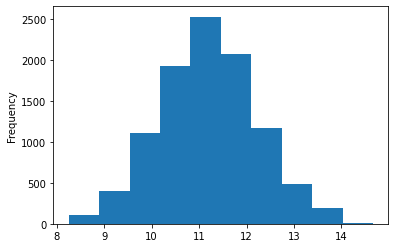

In [10]:
results['time'].plot(kind='hist')

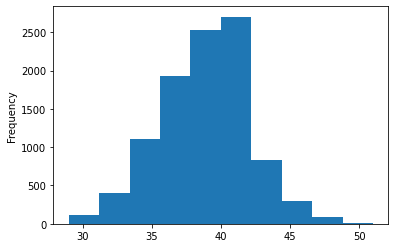

In [11]:
results['turn'].plot(kind='hist')

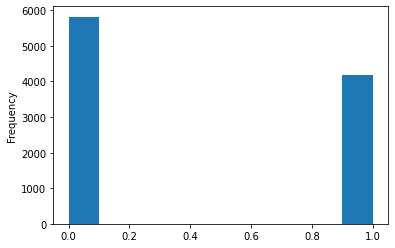

In [12]:
results['player'].plot(kind='hist')

In [13]:
import matplotlib.pyplot as plt

def run_simulation_for(player_time, cards=None):
  np.random.seed(574983)
  results = [simulate(player_time, cards=cards) for i in tqdm(range(10000))]
  results = pd.DataFrame(results, columns=["time", "player", "turn", "positions", "red_turns", "bonus_movements"])
  results['player'].plot(kind='hist')
  plt.show()
  results['turn'].plot(kind='hist')
  plt.show()
  results['time'].plot(kind='hist')
  plt.show()
  display(results.describe())
  return results

100%|██████████| 10000/10000 [00:03<00:00, 2992.24it/s]


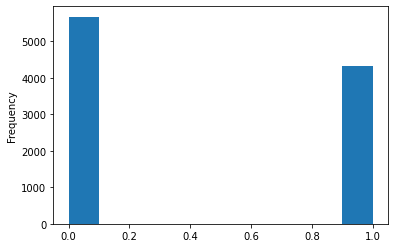

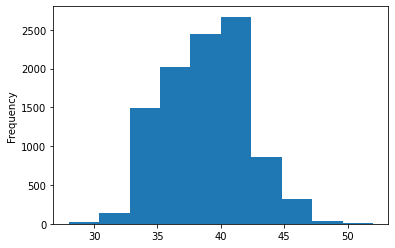

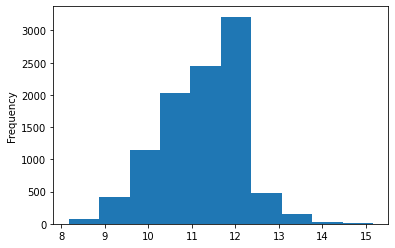

,time,player,turn,red_turns,bonus_movements
count,10000.000000,10000.000000,10000.000000,10000.0,10000.0
mean,11.176942,0.432500,38.726300,0.0,0.0
std,0.938455,0.495448,3.172412,0.0,0.0
min,8.166667,0.000000,28.000000,0.0,0.0
25%,10.583333,0.000000,37.000000,0.0,0.0
50%,11.166667,0.000000,39.000000,0.0,0.0
75%,11.750000,1.000000,41.000000,0.0,0.0
max,15.166667,1.000000,52.000000,0.0,0.0


In [14]:
run_simulation_for([5,30]);

In [15]:
np.array(ORIGINAL_CARDS).mean()

-0.16666666666666666

100%|██████████| 10000/10000 [00:03<00:00, 3228.14it/s]


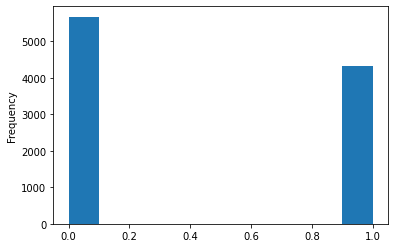

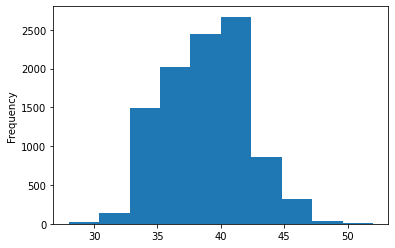

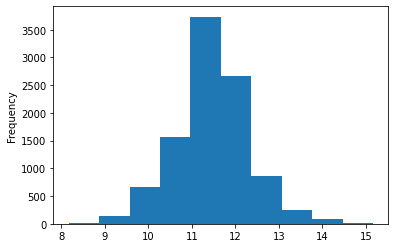

,time,player,turn,red_turns,bonus_movements
count,10000.000000,10000.000000,10000.000000,10000.0,10000.0
mean,11.413400,0.432500,38.726300,0.0,0.0
std,0.923537,0.495448,3.172412,0.0,0.0
min,8.166667,0.000000,28.000000,0.0,0.0
25%,11.000000,0.000000,37.000000,0.0,0.0
50%,11.583333,0.000000,39.000000,0.0,0.0
75%,12.166667,1.000000,41.000000,0.0,0.0
max,15.166667,1.000000,52.000000,0.0,0.0


In [16]:
run_simulation_for([30,5]);

100%|██████████| 10000/10000 [00:04<00:00, 2426.25it/s]


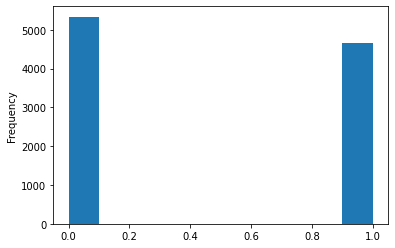

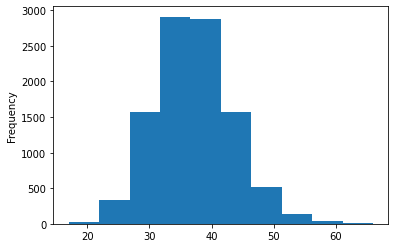

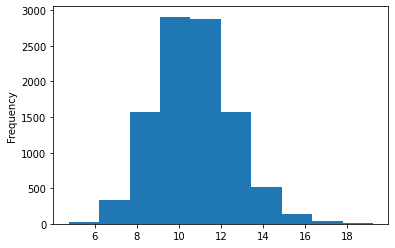

,time,player,turn,red_turns,bonus_movements
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,10.676300,0.466400,36.985600,12.368700,-2.098200
std,1.852329,0.498895,6.324602,4.260044,13.321513
min,4.750000,0.000000,17.000000,2.000000,-70.000000
25%,9.416667,0.000000,33.000000,9.000000,-11.000000
50%,10.583333,0.000000,37.000000,12.000000,-1.000000
75%,11.750000,1.000000,41.000000,15.000000,7.000000
max,19.250000,1.000000,66.000000,33.000000,42.000000


In [17]:
run_simulation_for([5,30], cards=ORIGINAL_CARDS);

100%|██████████| 10000/10000 [00:03<00:00, 2546.97it/s]


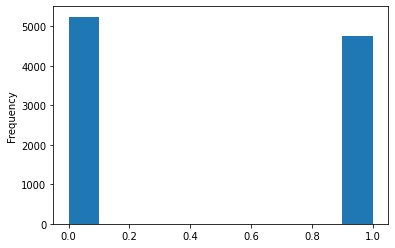

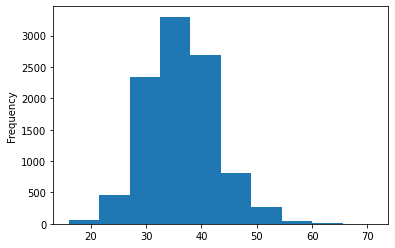

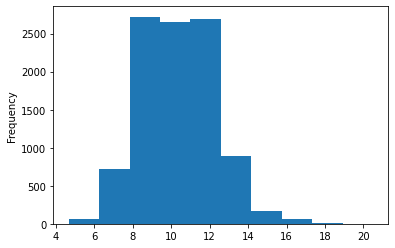

,time,player,turn,red_turns,bonus_movements
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,10.408208,0.475400,36.06000,11.787700,-0.023500
std,1.844542,0.499419,6.29814,4.103646,13.246482
min,4.666667,0.000000,16.00000,2.000000,-66.000000
25%,9.333333,0.000000,32.00000,9.000000,-8.000000
50%,10.500000,0.000000,36.00000,11.000000,1.000000
75%,11.666667,1.000000,40.00000,14.000000,9.000000
max,20.500000,1.000000,71.00000,34.000000,40.000000


In [18]:
run_simulation_for([5,30], cards=BALANCED_CARDS);

100%|██████████| 10000/10000 [00:06<00:00, 1454.12it/s]


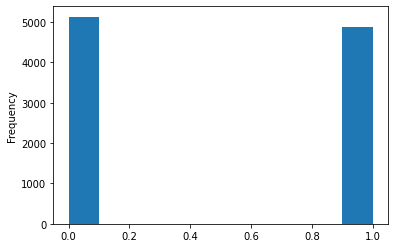

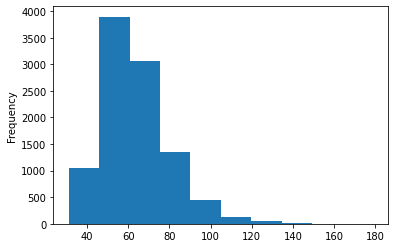

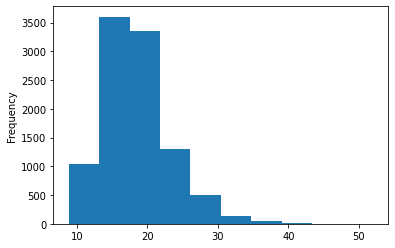

,time,player,turn,red_turns,bonus_movements
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,18.386558,0.486800,63.406200,21.015400,-73.579900
std,4.697530,0.499851,16.097668,9.630672,36.248026
min,8.833333,0.000000,31.000000,1.000000,-340.000000
25%,15.166667,0.000000,52.000000,14.000000,-93.000000
50%,17.583333,0.000000,61.000000,20.000000,-67.000000
75%,21.000000,1.000000,72.000000,26.000000,-48.000000
max,52.000000,1.000000,179.000000,95.000000,-1.000000


In [19]:
run_simulation_for([5,30], cards=SLOW_CARDS);